<b>Deep Learning LAB-8

<b>Name: </b> Nikhil V

<b>Roll No: </b> CH.EN.U4AIE22038

<b>Lab - 8 : </b> Sentiment Analysis on IMDB dataset using Recurrent Neural Networks.

# Importing the required modules

In [2]:
# Modules used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for acquiring the dataset
from tensorflow.keras.datasets import imdb

# Modules processing word vectors
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modules used for building the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Modules used for suppressing warnings
import warnings 
warnings.filterwarnings('ignore')


# Loading the dataset

In [3]:
class Dataset:
    
    def __init__(self):
        self.VOCABULARY_SIZE = 5000
        self.word2id = None
        self.id2word = None
    
    def load_dataset(self):
        (self.X_train, self.y_train), (self.X_test, self.y_test) = imdb.load_data(num_words = self.VOCABULARY_SIZE)
        print('Loaded dataset with {} training samples, {} test samples'.format(len(self.X_train), 
                                                                                len(self.X_test)))
        
    def word_index(self):
        self.word2id = imdb.get_word_index()
        self.id2word = {i: word for word, i in self.word2id.items()}
        print('Review with words:')
        print([self.id2word.get(i, ' ') for i in self.X_train[6]])
        print('Label:')
        print(self.y_train[6])
    
    def plot_review_lengths(self):
        l = list(map(len, self.X_train + self.X_test))
        
        plt.figure(figsize = (8,8))
        plt.hist(l,
                 color="crimson",
                 edgecolor="black")
        plt.xlabel("Length of Reviews")
        plt.ylabel("Number of review of that length")
        plt.title("Distribution of the Length of reviews")
        plt.show()
        

## Loading the dataset

In [4]:
d = Dataset()

In [5]:
d.load_dataset()

17464789/17464789 [==============================] - 10s 1us/step
Loaded dataset with 25000 training samples, 25000 test samples


## Loading the word index from keras

In [6]:
d.word_index()

1641221/1641221 [==============================] - 0s 0us/step
Review with words:
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many',

## Visualising the review lengths

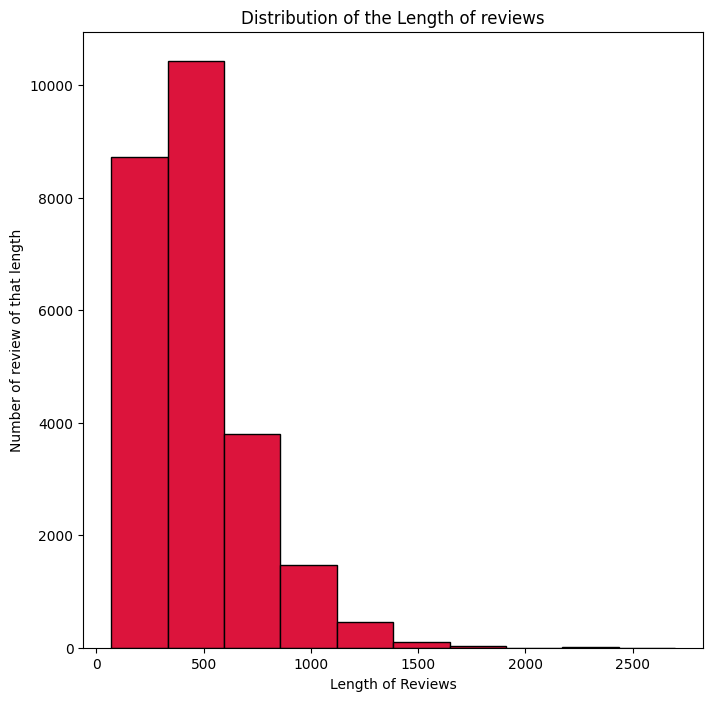

In [7]:
d.plot_review_lengths()

The length of movie reviews are skewed and do not follow a normal distribution. Moreover, the maximum length of movie reviews is 2697 and minimum length is 14. However, most of reviews have a length of 500 or close to it.

# Model Building

In [8]:
class RNN:
    
    def __init__(self, X_train, y_train, X_test, y_test) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.EMBEDDING_SIZE = 32
        self.VOCABULARY_SIZE = 5000
        self.BATCH_SIZE = 32
        self.NUM_EPOCHS = 5
        self.max_words = None
        self.model = None
        
        
        
    def __pad_word_vectors(self, max_words : int) -> None:
        self.max_words = max_words
        self.X_train = pad_sequences(self.X_train, 
                                     maxlen = self.max_words)
        self.X_test =  pad_sequences(self.X_test,
                                    maxlen = self.max_words)
        
    def __train_validation_split(self):
        self.X_valid, self.y_valid = self.X_train[:self.BATCH_SIZE], self.y_train[:self.BATCH_SIZE]
        self.X_train, self.y_train = self.X_train[self.BATCH_SIZE:], self.y_train[self.BATCH_SIZE:]
    
    def preprocessing(self):
        self.__pad_word_vectors(500)
        self.__train_validation_split()
    
    def build_model(self):
        self.model=Sequential()
        self.model.add(Embedding(self.VOCABULARY_SIZE, 
                            self.EMBEDDING_SIZE, 
                            input_length=self.max_words))
        self.model.add(LSTM(100))
        self.model.add(Dense(1, activation='sigmoid'))
        print(self.model.summary())
    
    def compile_model(self):
        self.model.compile(loss='binary_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
    
    
    def train_model(self):
        self.history = self.model.fit(self.X_train, 
                                 self.y_train, 
                                 validation_data=(self.X_valid, 
                                                  self.y_valid), 
                                 batch_size=self.BATCH_SIZE, 
                                 epochs=self.NUM_EPOCHS)
    
    def plot_history(self):
        fig, axs = plt.subplots(2, 1, figsize=(15,15))
        axs[0].plot(self.history.history['loss'])
        axs[0].plot(self.history.history['val_loss'])
        axs[0].title.set_text('Training Loss vs Validation Loss')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].legend(['Train','Val'])

        axs[1].plot(self.history.history['accuracy'])
        axs[1].plot(self.history.history['val_accuracy'])
        axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].legend(['Train', 'Val'])
    
    def evaluate_model(self):
        scores = model.evaluate(self.X_test, 
                                self.y_test, 
                                verbose=0)
        
        print('Test accuracy:', scores[1])
    

## Initiating the RNN

In [9]:
r = RNN(d.X_train, d.y_train, d.X_test, d.y_test)

## Preprocessing the data

In [10]:
r.preprocessing()

## Designing the model

In [11]:
r.build_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 213301 (833.21 KB)
Trainable params: 213301 (833.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Compiling the model

In [12]:
r.compile_model()

## Training the model

In [13]:
r.train_model()

Epoch 1/5


781/781 [==============================] - 91s 114ms/step - loss: 0.4755 - accuracy: 0.7749 - val_loss: 0.3403 - val_accuracy: 0.8750
Epoch 2/5
781/781 [==============================] - 75s 96ms/step - loss: 0.3351 - accuracy: 0.8642 - val_loss: 0.3344 - val_accuracy: 0.8125
Epoch 3/5
781/781 [==============================] - 76s 97ms/step - loss: 0.2617 - accuracy: 0.8963 - val_loss: 0.2961 - val_accuracy: 0.8125
Epoch 4/5
781/781 [==============================] - 77s 98ms/step - loss: 0.2209 - accuracy: 0.9145 - val_loss: 0.1588 - val_accuracy: 0.9062
Epoch 5/5
781/781 [==============================] - 77s 98ms/step - loss: 0.1969 - accuracy: 0.9263 - val_loss: 0.1603 - val_accuracy: 0.8750


## Plotting the training history

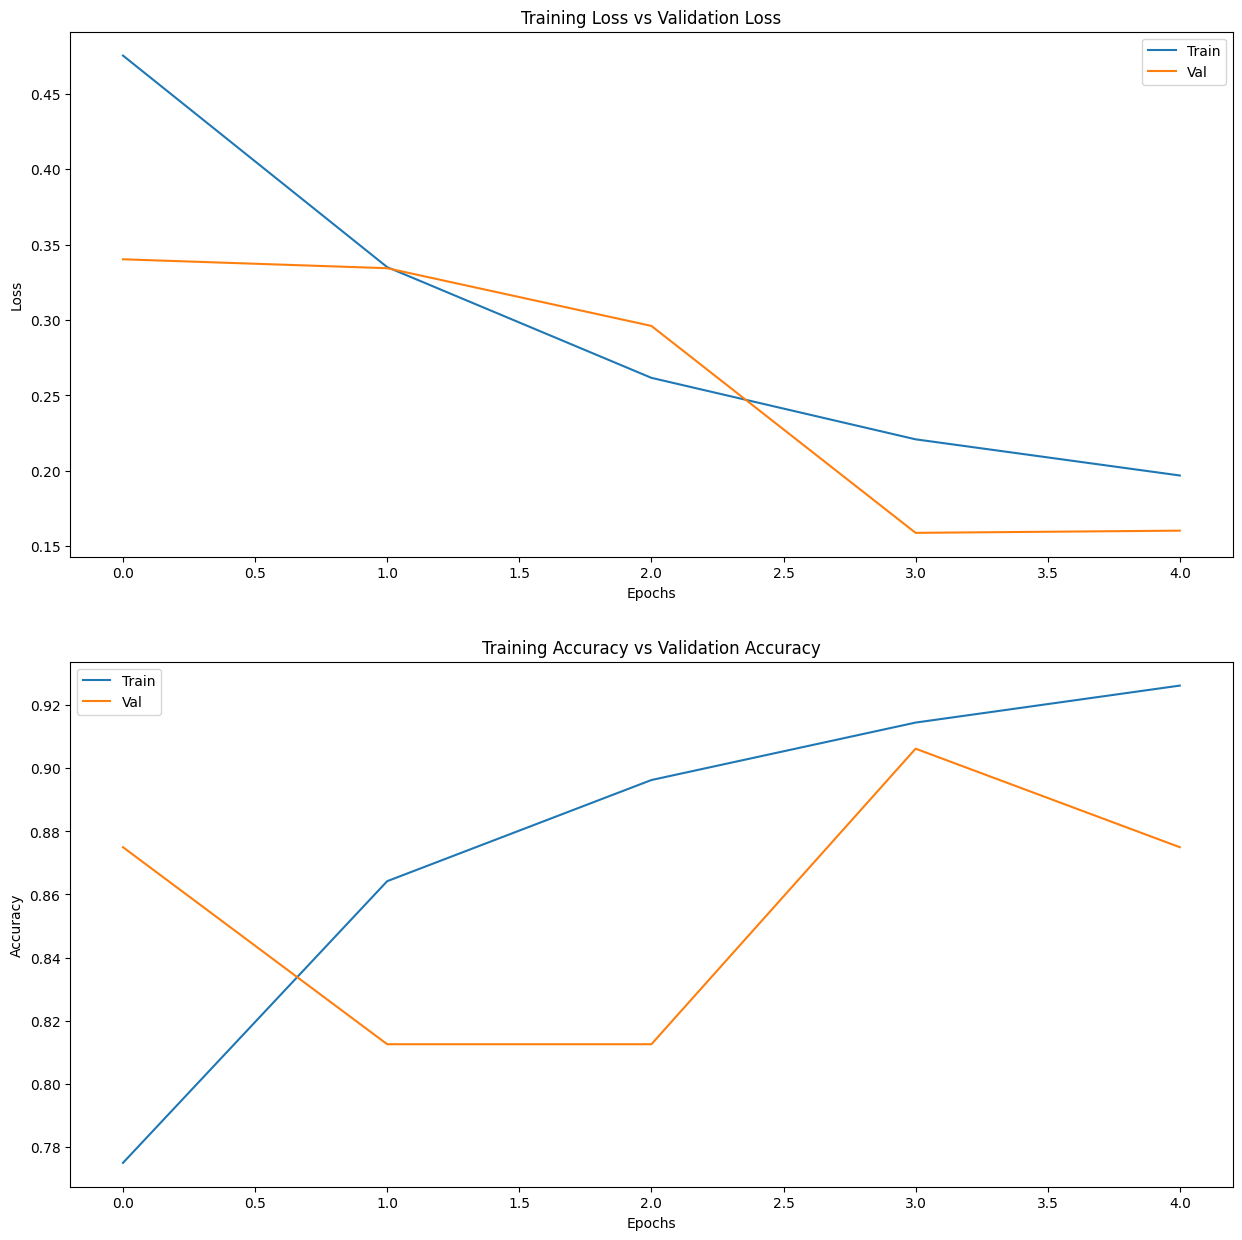

In [14]:
r.plot_history()

## Evaluating the model

In [15]:
scores = r.model.evaluate(r.X_test, 
                                r.y_test, 
                                verbose=0)
        
print('Test accuracy:', scores[1])

Test accuracy: 0.8733999729156494


# Conclusion

- A RNN model is designed to classify the sentiment of the movie reviews in the IMDB dataset into two categories.
- The model is fitted on the training data resulting in an accuracy of 92.65% and validation accuracy of 96.88%. Moreover, on the evaluation of the model on the test dataset we get an accuracy of 87.33999%. 
-  The model needs epoches since validation accuracy is greater than train accuracy which is inappropriate.
- Hence, the sentiment analysis of the reviews in IMDB dataset is achieved using Recurrent Neural Networks(RNN).